In [1]:
# Create Utility Def
import pandas as pd
import numpy as np
import time
import csv

#For Missing Value and Feature Engineering
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold


def feature_separate(X):
    numerical_features = [c for c, dtype in zip(X.columns, X.dtypes)
                         if dtype.kind in ['i','f'] and c !='Index']
    other_features = [c for c, dtype in zip(X.columns, X.dtypes)
                         if dtype.kind not in ['i','f']]
    
    return numerical_features, other_features

def split_x_y(data):
    X = data.drop(['RefId', 'IsBadBuy'], axis=1)
    y = data['IsBadBuy']
    return X, y

def numerical_imputer(X, numerical_features):
    # create a new df only containing numerical_features
    X_num = pd.DataFrame() 

    # 1. replace None in "numerical_features" with KNNImputer
    num_imputer = KNNImputer(n_neighbors=2, weights="uniform")
    for num_col in numerical_features:
        ori_data = X[num_col].values.reshape(-1, 1)
        imputed_data = num_imputer.fit_transform(ori_data)
        X_num[num_col] = pd.DataFrame(imputed_data) 
   
    return X_num

def sk_min_max_scaler(X_num, numerical_features):
    # 2. max - min Normalization
    scaler = MinMaxScaler() 
    X_num = scaler.fit_transform(X_num)

    # because "scaler.fit_transform" return numpy.array, we need to covert it to pandas df again
    X_num = pd.DataFrame(X_num) 
    X_num.columns = numerical_features

    return X_num

def sk_standard_scaler(X_num, numerical_features):
    # 2. mean - std Normalization
    scaler = StandardScaler() 
    X_num = scaler.fit_transform(X_num)

    # because "scaler.fit_transform" return numpy.array, we need to covert it to pandas df again
    X_num = pd.DataFrame(X_num) 
    X_num.columns = numerical_features

    return X_num


def del_uninformative_variables(X_num, numerical_features):
    selector = VarianceThreshold() 
    X_num = selector.fit_transform(X_num)

    # because "scaler.fit_transform" return numpy.array, we need to covert it to pandas df again
    X_num = pd.DataFrame(X_num) 
    X_num.columns = numerical_features

    return X_num




'''
--------------- For categorical_features ---------------

1. replace None in "numerical_features" with SimpleImputer

2. do OneHotEncoder to categorical_features


# create a new df only containing categorical_features
X_cat = pd.DataFrame() 

# 1. replace None in "numerical_features" with SimpleImputer
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
for num_cat in categorical_features:
    ori_data = X[num_cat].values.reshape(-1, 1)
    imputed_data = cat_imputer.fit_transform(ori_data)
    X_cat[num_cat] = pd.DataFrame(imputed_data) 
print(f'X_cat: {X_cat.shape}')
print(f'X_cat: {type(X_cat)}')


# 2. do OneHotEncoder to categorical_features

encoder = OneHotEncoder(categories = 'auto', handle_unknown = 'ignore')
X_cat_ = encoder.fit_transform(X_cat)
print(f'X_cat: {type(X_cat_)}')


'''

'\n--------------- For categorical_features ---------------\n\n1. replace None in "numerical_features" with SimpleImputer\n\n2. do OneHotEncoder to categorical_features\n\n\n# create a new df only containing categorical_features\nX_cat = pd.DataFrame() \n\n# 1. replace None in "numerical_features" with SimpleImputer\ncat_imputer = SimpleImputer(strategy = \'constant\', fill_value = \'missing\')\nfor num_cat in categorical_features:\n    ori_data = X[num_cat].values.reshape(-1, 1)\n    imputed_data = cat_imputer.fit_transform(ori_data)\n    X_cat[num_cat] = pd.DataFrame(imputed_data) \nprint(f\'X_cat: {X_cat.shape}\')\nprint(f\'X_cat: {type(X_cat)}\')\n\n\n# 2. do OneHotEncoder to categorical_features\n\nencoder = OneHotEncoder(categories = \'auto\', handle_unknown = \'ignore\')\nX_cat_ = encoder.fit_transform(X_cat)\nprint(f\'X_cat: {type(X_cat_)}\')\n\n\n'

In [2]:
import pandas as pd
import numpy as np
import time
import csv
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


# load data

In [3]:
train = pd.read_csv(r'training.csv')
test = pd.read_csv(r'test.csv')

print(f'train: {train.shape}')
print(f'test: {test.shape}')

train: (72983, 34)
test: (48707, 33)


In [4]:
# print(f'train.columns: {train.columns}')
# print(f'test.columns: {test.columns}')

# preprocessing

grouping

In [5]:
# Working on train Data
train = grouping(train)

split X(input variables) and y(target, label)

In [6]:
X, y = split_x_y(train)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (72983, 38)
y: (72983,)


Feature Type Separation

In [7]:
numerical_features, categorical_features = feature_separate(X)

print(f'numerical_features: {len(numerical_features)}')
print(f'categorical_features: {len(categorical_features)}')

numerical_features: 23
categorical_features: 15


--------------- For numerical_features ---------------

1. replace None in "numerical_features" with KNNImputer

2. There are 2 kinds of normalization method:

    a. mean - std Normalization

    b. max - min Normalization (we use this here)
    
3. remove the variables whose std = 0, aka uninformative_variables

In [8]:
### replace None in "numerical_features" with KNNImputer, and assign result to X_num
X_num = numerical_imputer(X, numerical_features)

### max - min Normalization
# X_num = sk_min_max_scaler(X_num, numerical_features)
X_num = sk_standard_scaler(X_num, numerical_features)

### remove the variables whose std = 0, aka uninformative_variables
X_num = del_uninformative_variables(X_num, numerical_features)

print(f'X_num: {X_num.shape}')

X_num: (72983, 23)


Combine numerical_features and categorical_features

***But we only use numerical_features here***

In [9]:
X = X_num 

print(f'X: {X.shape}')
print(f'y: {y.shape}')

print(f'total None in X: {X.isna().sum().sum()}')

X: (72983, 23)
y: (72983,)
total None in X: 0


split trainning dataset and valid dataset

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,  y, test_size = 0.3, random_state = 1)

y_train = np.expand_dims(y_train, axis = 1)
y_val = np.expand_dims(y_val, axis = 1)

In [11]:
feature_names = X.columns
target_names = ['bad','good']

In [12]:
print(f'feature_names: {feature_names}')
print(f'target_names: {target_names}')

feature_names: Index(['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'mean_MMRAcquisitionAuctionAveragePrice_Make',
       'mean_MMRAcquisitionAuctionAveragePrice_Model',
       'mean_MMRAcquisitionAuctionAveragePrice_Trim',
       'mean_MMRAcquisitionAuctionAveragePrice_SubModel',
       'mean_MMRAcquisitionAuctionAveragePrice_Color',
       'mean_MMRAcquisitionAuctionAveragePrice_Transmission'],
      dtype='object')
target_names: ['bad', 'good']


In [13]:
print(f'X_train: {X_train.shape}')
print(f'Y_train: {y_train.shape}')

X_train: (51088, 23)
Y_train: (51088, 1)


# One hot

In [14]:
# Creating a one hot encode array
def onehot(x):
    x_onehot = np.zeros((x.size, x.max() + 1))
    x_onehot[np.arange(x.size), x] = 1
    return x_onehot

In [15]:
# y_train = onehot(y_train)
# y_val = onehot(y_val)

# Fit the model - 1. Decition Tree

In [16]:
clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)
Y_pred_train = clf.predict(X_train) 
print(f'Y_pred_train: {Y_pred_train}')

Y_pred_train: [0 0 0 ... 0 0 1]


Text(0.5, 1.0, 'Feature Importance')

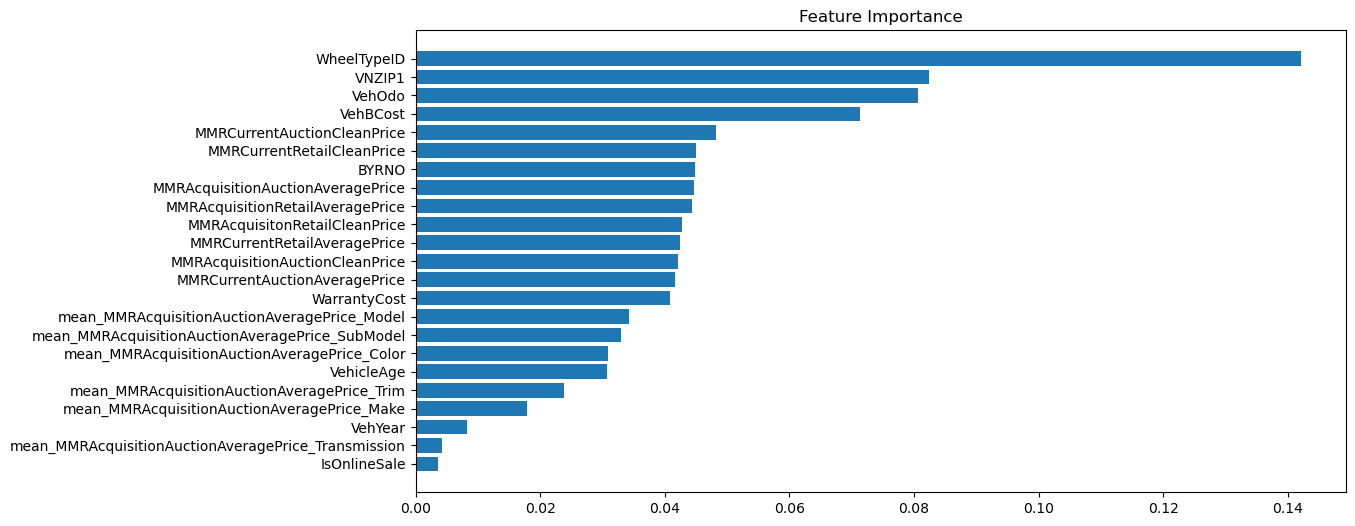

In [17]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title('Feature Importance')


# Test the model

In [18]:
# Calculate Accuracy
Y_pred = clf.predict(X_val) 
print(f'Y_pred_test: {Y_pred}')
accuracy_score(y_val, Y_pred)

Y_pred_test: [0 0 0 ... 0 0 0]


0.8189540991093857

In [19]:
# Calculate Precision and Recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_val, Y_pred)
recall = recall_score(y_val, Y_pred)
print(precision)
print(recall)

0.2933125972006221
0.3578747628083491


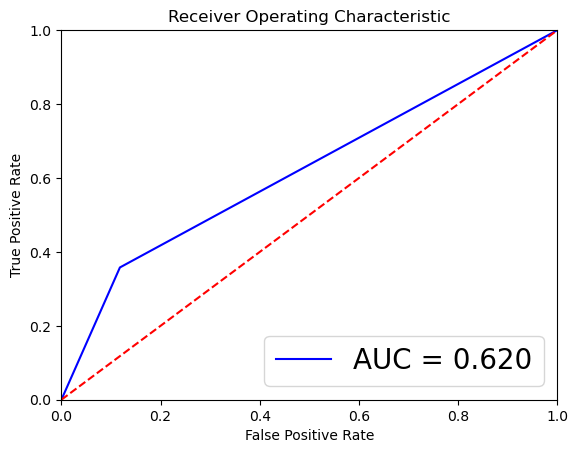

In [20]:
# Plot ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=20)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Fit the model - 2. Random Forests

In [21]:
clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)
Y_pred_train = clf.predict(X_train) 
# print(f'Y_pred_train: {Y_pred_train}')

C:\Users\WIN10\anaconda3\envs\keras_2.3.1\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Text(0.5, 1.0, 'Feature Importance')

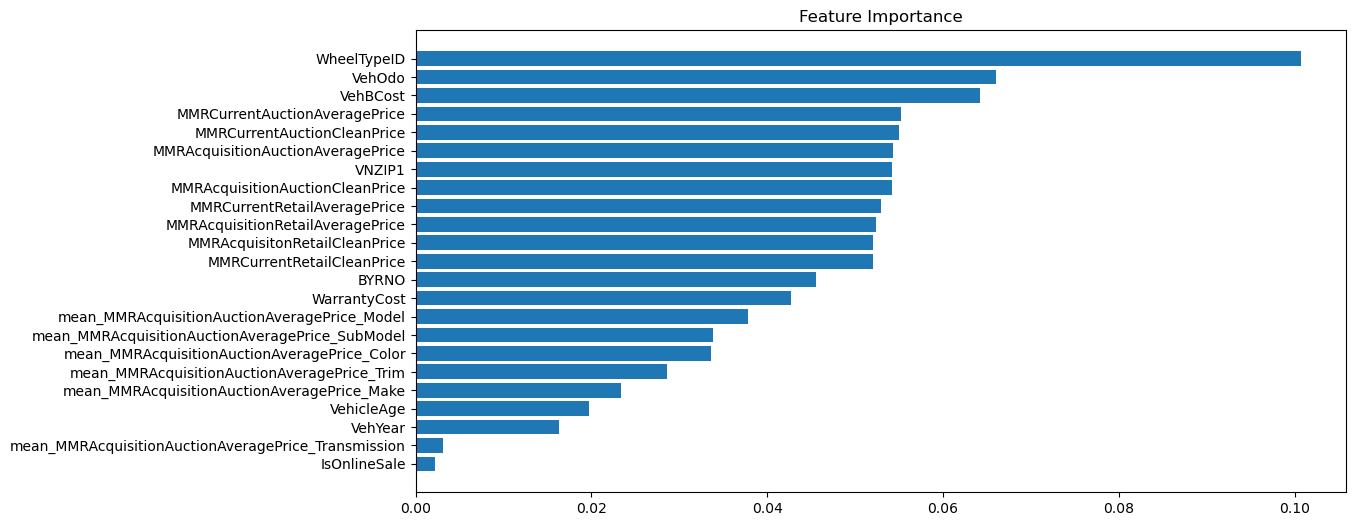

In [22]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title('Feature Importance')

# Test the model

In [23]:
# Calculate Accuracy
Y_pred = clf.predict(X_val) 
print(f'Y_pred_test: {Y_pred}')
accuracy_score(y_val, Y_pred)

Y_pred_test: [0 0 0 ... 0 0 0]


0.900114181319936

In [24]:
# Calculate Precision and Recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_val, Y_pred)
recall = recall_score(y_val, Y_pred)
fscore = 2*precision*recall/(precision + recall)

print(precision)
print(recall)
print(fscore)

0.8010752688172043
0.22618595825426946
0.3527670908552826


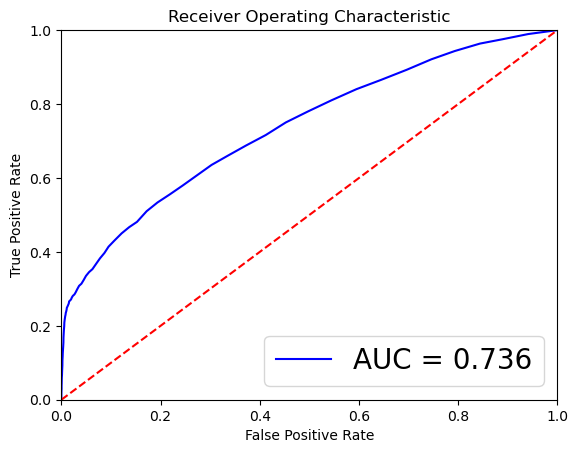

In [25]:
# Plot ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=20)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Fit the model - 3. XGB Classifier

In [26]:
clf = XGBClassifier()
model = clf.fit(X_train, y_train)

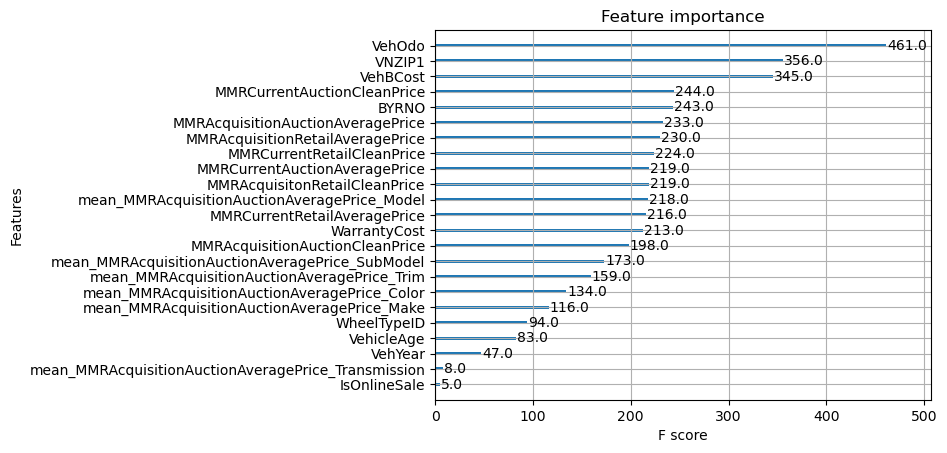

In [27]:
plot_importance(clf)
plt.show()

# Test the model

In [28]:
# Calculate Accuracy
Y_pred = clf.predict(X_val) 
accuracy = accuracy_score(y_val, Y_pred)
accuracy_score(y_val, Y_pred)

0.9002511989038593

In [29]:
# Calculate Precision and Recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_val, Y_pred)
recall = recall_score(y_val, Y_pred)
print(precision)
print(recall)

0.7588978185993112
0.250853889943074


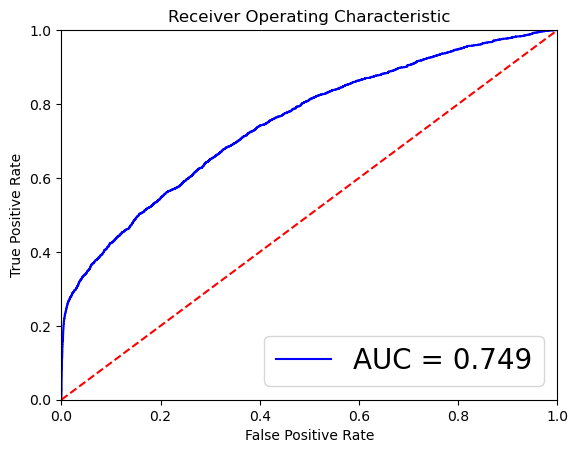

In [30]:
# Plot ROC 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=20)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# CCF(Cross-Correlation Function) Analysis

In [31]:
import pandas as pd
import numpy as np
import time
import csv
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from util import grouping, split_x_y, feature_separate, numerical_imputer, sk_min_max_scaler, \
    sk_standard_scaler, del_uninformative_variables

# Create Utility Def

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   #(pip install seaborn==0.8.1)

class CCF:
    def __init__(self,url,maxlag=0):
#         d=pd.read_excel(url, encoding='latin-1')
        d=url
        self.label=d.iloc[:,0:].keys()     #Variable names
        # self.label=d[:,0:].keys()
        self.data=np.array(d.iloc[:,0:])   #(2000, 90)
        # self.data=np.array(d[:,0:])
        self.maxlag=maxlag                 # 0
        self.cov=np.zeros([self.data.shape[1],self.data.shape[1]]) #(90,90)

    def cal(self):
        if(self.maxlag==0):
            self.cov=np.corrcoef(self.data.T)  #(90, 90)

        for i in range(self.cov.shape[1]):
            for j in range(self.cov.shape[1]):
                self.cov[i][j]=abs(self.cov[i][j])
                if(np.isnan(self.cov[i][j])):
                    self.cov[i][j]=0.001  #(90, 90) Here, each correlation value is turned into a positive number

    def show(self):  #Draw a chart (correlations of each variable)
        label=list(self.label)   #Variable names
#         temp=pd.DataFrame(self.cov,index=label,columns=label)
        temp=pd.DataFrame(self.cov,index=label)
        temp_=pd.DataFrame(self.cov)
#         print(temp_)
        f, ax = plt.subplots(figsize=(14, 14))
        sns.heatmap(temp, annot=False, square=True,cmap="Blues",fmt='.1f', linewidths=1)  #Setting of plot
        plt.show()

    def get_matrix(self):  # Draw a chart (correlations of each variable)
        label = list(self.label)  #Variable names
        temp = pd.DataFrame(self.cov, index=label, columns=label)

        return temp

# CCF

In [37]:
X_train['IsBadBuy'] = y_train
preprocessed_data = X_train
print(f'preprocessed_data: {preprocessed_data.shape}')

preprocessed_data: (51088, 24)


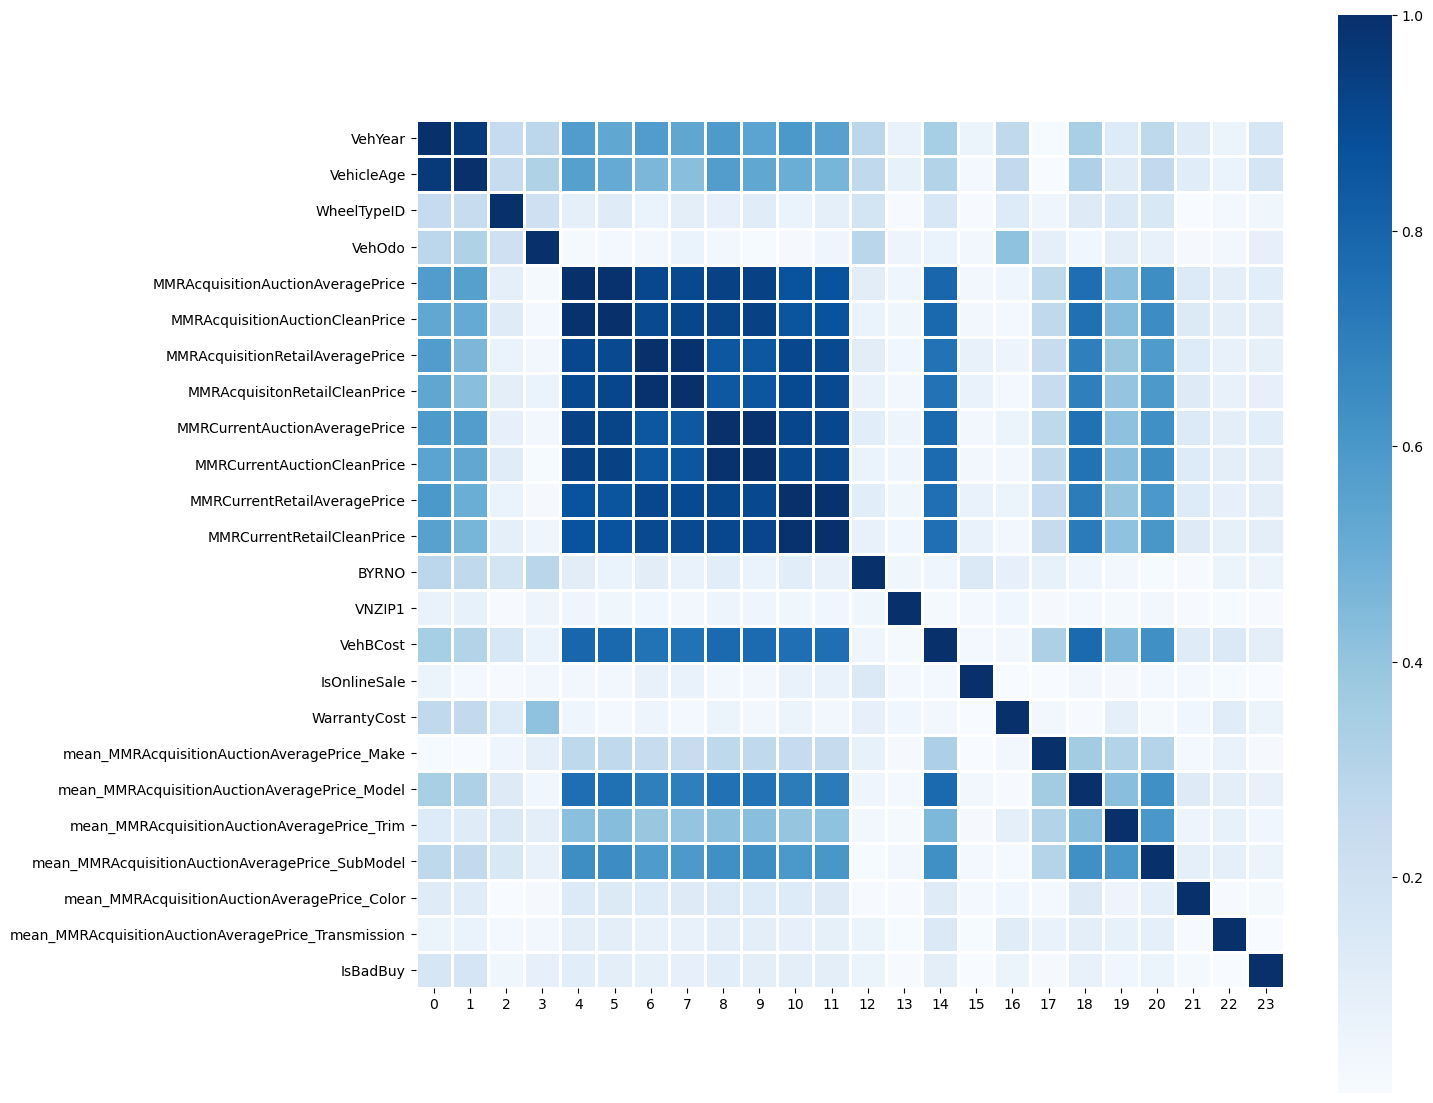

In [38]:
# Creating a DataFrame using preprocessed_data
tep_data_pd = pd.DataFrame(preprocessed_data)

# Creating a Cross-Correlation Function (CCF) object using tep_data_pd and setting the maximum lag to 0
CCFtrain = CCF(tep_data_pd, maxlag=0)

# Calculating the cross-correlation
CCFtrain.cal()

# Displaying the cross-correlation
CCFtrain.show()

# Getting the cross-correlation matrix
tep_data_matrix = CCFtrain.get_matrix()

In [39]:
# Extracting the last row of the cross-correlation matrix
correlation = tep_data_matrix.iloc[-1, :]

# Sorting the correlation values in descending order
correlation_sorted = correlation.sort_values(ascending=False)